In [112]:
!pip install pandas scikit-learn jupyter matplotlib scipy theano


In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
from sklearn.feature_extraction.text import CountVectorizer

Task 1


In [114]:
titanic_file = "/content/sample_data/titanic3.xls"
df = pd.read_excel(titanic_file)

Basic Dataset Overview

In [115]:
df.head() #Used it just to see the overview (colums and rows) of the data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Exploratory Data Analysis

In [117]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<ipython-input-118-a6f8f991ed3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="viridis", ax=ax[0])
<ipython-input-118-a6f8f991ed3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pclass", data=df, palette="Set2", ax=ax[1])
<ipython-input-118-a6f8f991ed3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="coolwarm", ax=ax[2])


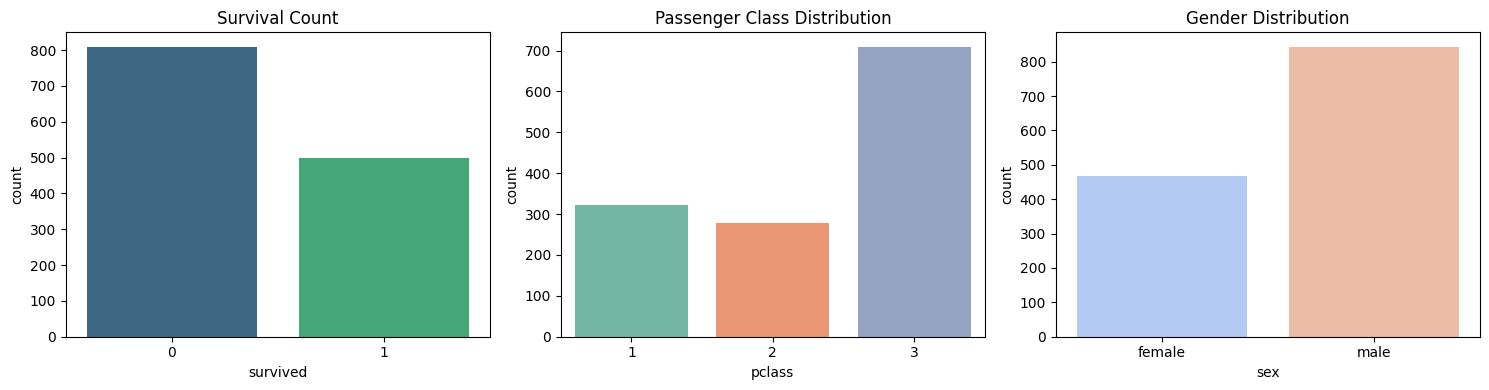

In [118]:
#count plots -> survived, class, gender
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x="survived", data=df, palette="viridis", ax=ax[0])
ax[0].set_title("Survival Count")
sns.countplot(x="pclass", data=df, palette="Set2", ax=ax[1])
ax[1].set_title("Passenger Class Distribution")
sns.countplot(x="sex", data=df, palette="coolwarm", ax=ax[2])
ax[2].set_title("Gender Distribution")
plt.tight_layout()
plt.show()


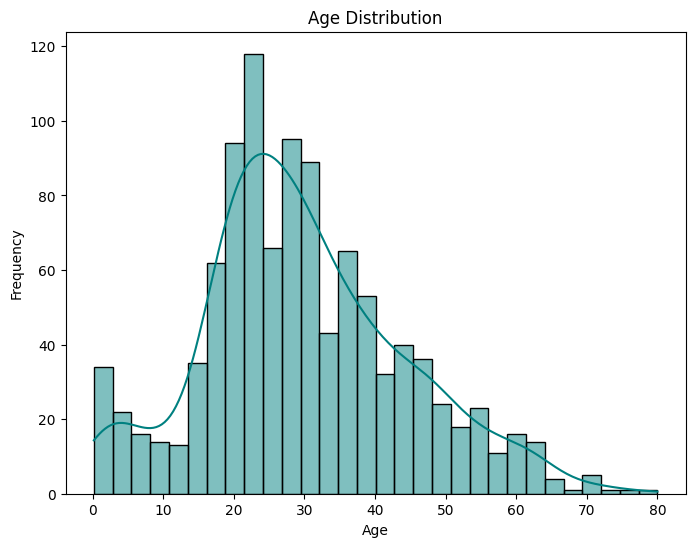

In [119]:
#age distribution of people that were in the titanic (dropping missing values)
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color="teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


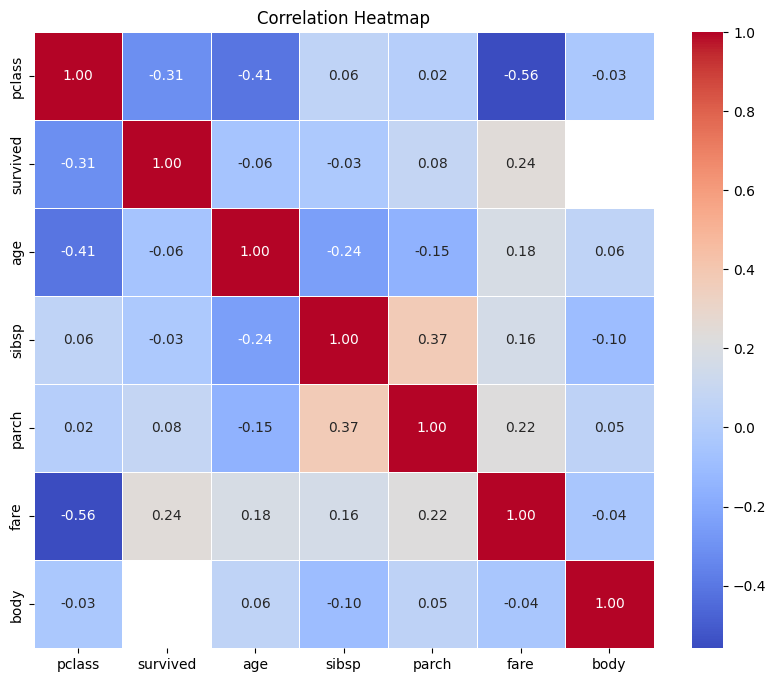

In [120]:
numeric_df = df.select_dtypes(include=['number']) # I used gpt for this since I had problems with values -> was trying to convert string to float since .corr uses numeric for correlation. Now only numeric values are chosen.

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Task 2

In [121]:
missing_values = df.isnull().sum()
print(missing_values[missing_values> 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


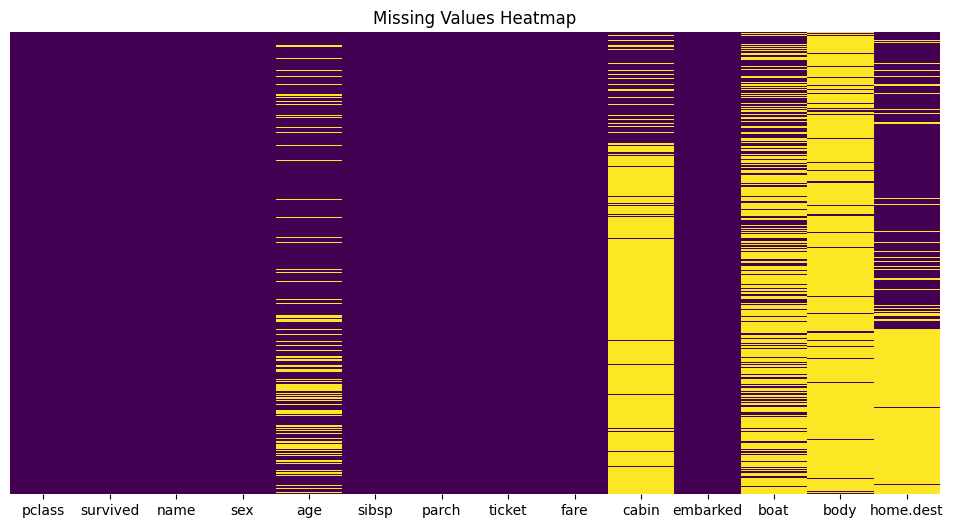

In [122]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels = False)
plt.title("Missing Values Heatmap")
plt.show()

Strategy on missing values:

---
Age: Represent variable using the median/mean based on the class or gender of the passangers

Cabin: Might drop it as there are a lot of missing values

Boat: As boat is the assigned lifeboat to each individual, it is best to mark as 'None' since this may just be because they did not assign all of the people one

Body: Mark as 'Not Found' since the missing data are most likely the missing bodies.

Home.dest: drop; not revelant as it might lead to un-insightfull conclusions

Task 3

Looking over the variables above and their missing values, the categorical variables should be:

pclass, sec, embarked -> great predictors for survival

Other variables have either too many missing variables or are too unique to be added as categories.


In [123]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['pclass', 'sex', 'embarked']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("Original DataFrame shape:", df.shape)
print("Encoded DataFrame shape: ", df_encoded.shape)
df_encoded.head()

Original DataFrame shape: (1309, 14)
Encoded DataFrame shape:  (1309, 20)


,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_Unknown
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


The dataset shape changed from (1309, 14) to (1309,20) as each categorical column was asplit into multiple encoded columns.

Impact on ML:
1. Numeric format so algorithms that require numeric inputs can handle it
2. No normal bias -> each column is separate for each category so the model wont assume a correlation between categories
3. Allows for more complexity in models
4. Better intepretability -> categories become its own binary feature -> easy to determine which category influences model


Task 4

In [124]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = ['age', 'sibsp', 'parch', 'fare']
df_numeric = df_encoded[numeric_cols].copy()

standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df_numeric)

df_standardized = pd.DataFrame(df_standardized, columns=numeric_cols, index=df_numeric.index)
print("Standardized Data (first 5 rows):")
print(df_standardized.head())

minmax_scaler = MinMaxScaler()
df_normalized = minmax_scaler.fit_transform(df_numeric)

df_normalized = pd.DataFrame(df_normalized, columns=numeric_cols, index=df_numeric.index)
print("\nNormalized Data (first 5 rows):")
print(df_normalized.head())

Standardized Data (first 5 rows):
        age     sibsp     parch      fare
0 -0.061162 -0.479087 -0.445000  3.441165
1 -2.010496  0.481288  1.866526  2.285603
2 -1.935302  0.481288  1.866526  2.285603
3  0.008251  0.481288  1.866526  2.285603
4 -0.338812  0.481288  1.866526  2.285603

Normalized Data (first 5 rows):
        age  sibsp     parch      fare
0  0.361169  0.000  0.000000  0.412503
1  0.009395  0.125  0.222222  0.295806
2  0.022964  0.125  0.222222  0.295806
3  0.373695  0.125  0.222222  0.295806
4  0.311064  0.125  0.222222  0.295806


Difference
- Standardization
  - Centers data around a mean of 0 and standard derivation of 1 (with values being both positive and negative (above or below mean))
  - Used in algos that assume data is normally distributed or sensitive to feature scale

- Normalization
 - Rescales features to a [0,1] range
 - Used in algos sensitive to magnitued of values or requiring a bound

Importance
 - Prevents one feature with a large range from dominating the ml Model
 - Faster optimization
 - Essential for distance based algorithms (clustering, KNN) and gradient based methods (neural networks/logistic regressions) (got these examples from GPT)

Task 5

Split the data into training, validation and testing

60% training

20% validation

20% testing


In [125]:
from sklearn.model_selection import train_test_split

df_features = df.drop(columns=["name", "ticket", "cabin", "boat", "body", "home.dest", "survived"])

X = df_features
y = df["survived"]

X_train, X_others, y_train, y_others = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_others,
    y_others,
    test_size=0.5,
    random_state=42,
    stratify=y_others
)

print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (785, 7) (785,)
Validation set size: (262, 7) (262,)
Test set size: (262, 7) (262,)


Task 6


In [126]:
!pip install imbalanced-learn

In [127]:
print(X_train_numeric.dtypes)


pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_female    float64
sex_male      float64
embarked_C    float64
embarked_Q    float64
embarked_S    float64
dtype: object


In [128]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

cat_cols = X_train.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe_data = ohe.fit_transform(X_train[cat_cols])
    ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index)
    X_train = X_train.drop(columns=cat_cols)
    X_train = pd.concat([X_train, ohe_df], axis=1)

imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Resampled training set distribution:")
print(pd.Series(y_train_resampled).value_counts())

Resampled training set distribution:
survived
0    485
1    485
Name: count, dtype: int64


Task 7

In [129]:
import numpy as np

#Low-variance features dropping -> provides little to no signal for model
variances = X_train_resampled.var()
low_var_cols = variances[variances < 0.01].index  # threshold can vary
print("Low variance columns to drop:", list(low_var_cols))

X_train_fs = X_train_resampled.drop(columns=low_var_cols)
X_val_fs   = X_val.drop(columns=low_var_cols, errors="ignore")
X_test_fs  = X_test.drop(columns=low_var_cols, errors="ignore")

# Drop highly correlated features
corr_matrix = X_train_fs.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# If correlation > 0.9, we drop the feature as it may end up being redundant
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
print("Highly correlated columns to drop:", to_drop)

X_train_fs = X_train_fs.drop(columns=to_drop)
X_val_fs   = X_val_fs.drop(columns=to_drop, errors="ignore")
X_test_fs  = X_test_fs.drop(columns=to_drop, errors="ignore")

print("\nFeatures remaining after feature selection:")
print(list(X_train_fs.columns))
print("\nShapes after feature selection:")
print("X_train_fs:", X_train_fs.shape)
print("X_val_fs:  ", X_val_fs.shape)
print("X_test_fs: ", X_test_fs.shape)


Low variance columns to drop: []
Highly correlated columns to drop: ['sex_male']

Features remaining after feature selection:
['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C', 'embarked_Q', 'embarked_S']

Shapes after feature selection:
X_train_fs: (970, 9)
X_val_fs:   (262, 7)
X_test_fs:  (262, 7)


We perform tasks 6 and 7 (handling class imbalance and feature selection) only on the training set to prevent data leakage. If we applied them to the entire dataset, information from the validation or test sets would influence our preprocessing, leading to overly optimistic performance estimates and reduced generalizability.

Task 8

In [132]:

X_val_cat = X_val[original_cat_cols].astype(str)
X_val_encoded = ohe.transform(X_val_cat)
X_val_encoded_df = pd.DataFrame(X_val_encoded,
                                columns=ohe.get_feature_names_out(original_cat_cols),
                                index=X_val.index)

X_val_numeric = X_val.drop(columns=original_cat_cols)
X_val_numeric = pd.concat([X_val_numeric, X_val_encoded_df], axis=1)

X_val_imputed = pd.DataFrame(imputer.transform(X_val_numeric),
                             columns=X_val_numeric.columns,
                             index=X_val.index)

X_val_fs = X_val_imputed.drop(columns=low_var_cols, errors="ignore")
X_val_fs = X_val_fs.drop(columns=to_drop, errors="ignore")

y_pred = model.predict(X_val_fs)


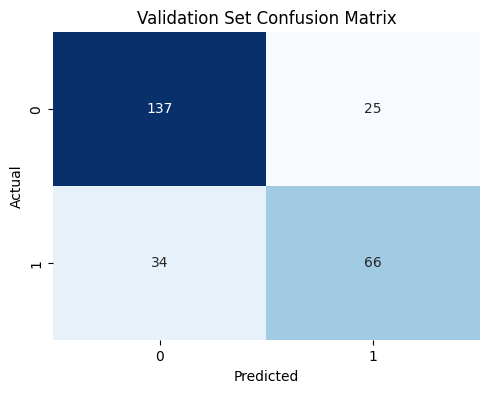

Accuracy: 0.775
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.73      0.66      0.69       100

    accuracy                           0.77       262
   macro avg       0.76      0.75      0.76       262
weighted avg       0.77      0.77      0.77       262



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


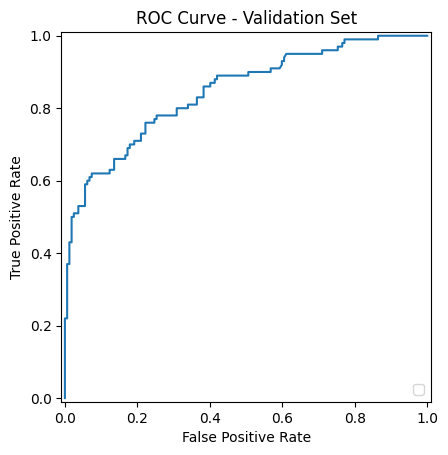

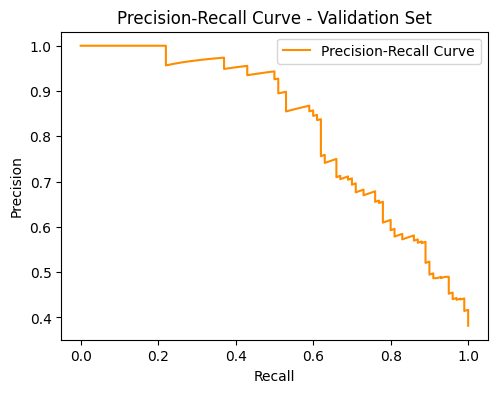

<ipython-input-133-9d099868afdd>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


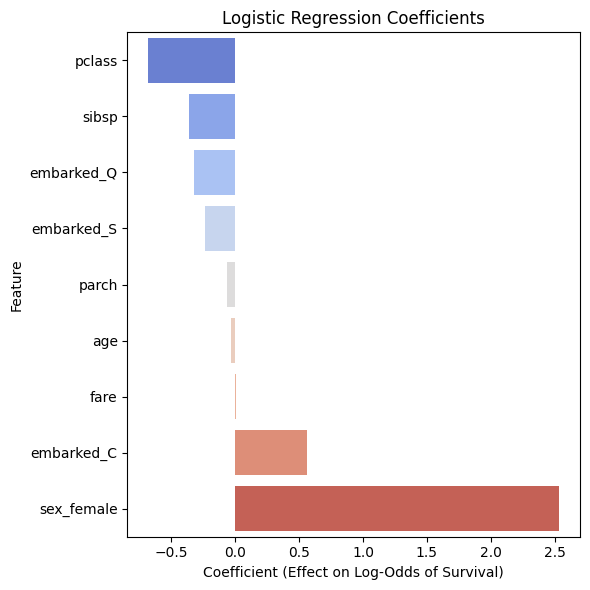

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, RocCurveDisplay, precision_recall_curve
)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_fs, y_train_resampled)  # Train on feature-selected & SMOTE-resampled training data

y_pred = model.predict(X_val_fs)
y_pred_proba = model.predict_proba(X_val_fs)[:, 1]  # Probability of the positive class (survived=1)

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5.5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Validation Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.3f}")

report = classification_report(y_val, y_pred)
print("Classification Report:")
print(report)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - Validation Set")
plt.show()

precisions, recalls, pr_thresholds = precision_recall_curve(y_val, y_pred_proba)
plt.figure(figsize=(5.5, 4))
plt.plot(recalls, precisions, label="Precision-Recall Curve", color='darkorange')
plt.title("Precision-Recall Curve - Validation Set")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Logistic Regression coefficients show how each feature influences the odds of survival
coef_df = pd.DataFrame({
    'Feature': X_train_fs.columns,
    'Coefficient': model.coef_[0]
})
# Sort by the coefficient value
coef_df.sort_values('Coefficient', inplace=True)

plt.figure(figsize=(6, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient (Effect on Log-Odds of Survival)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
